This chapter lays out the origins of Apache Spark and its underlying philosophy. It
also surveys the main components of the project and its distributed architecture. If
you are familiar with Spark’s history and the high-level concepts, you can skip this
chapter.

# Introduction to Apache Spark:
## A Unified Analytics Engine

## The Genesis of Spark

In this section, we’ll chart the course of Apache Spark’s short evolution: its genesis,
inspiration, and adoption in the community as a de facto big data unified processing
engine.

## Big Data and Distributed Computing at Google

When we think of scale, we can’t help but think of the ability of Google’s search
engine to index and search the world’s data on the internet at lightning speed. The
name Google is synonymous with scale. In fact, Google is a deliberate misspelling of
the mathematical term googol: that’s 1 plus 100 zeros!
Neither traditional storage systems such as relational database management systems
(RDBMSs) nor imperative ways of programming were able to handle the scale at
which Google wanted to build and search the internet’s indexed documents. The
resulting need for new approaches led to the creation of the Google File System (GFS),
MapReduce (MR), and Bigtable.
While GFS provided a fault-tolerant and distributed filesystem across many com‐
modity hardware servers in a cluster farm, Bigtable offered scalable storage of
structured data across GFS. MR introduced a new parallel programming paradigm, based on functional programming, for large-scale processing of data distributed over
GFS and Bigtable.
In essence, your MR applications interact with the MapReduce system that sends
computation code (map and reduce functions) to where the data resides, favoring
data locality and cluster rack affinity rather than bringing data to your application.
The workers in the cluster aggregate and reduce the intermediate computations and
produce a final appended output from the reduce function, which is then written to a
distributed storage where it is accessible to your application. This approach signifi‐
cantly reduces network traffic and keeps most of the input/output (I/O) local to disk
rather than distributing it over the network.
Most of the work Google did was proprietary, but the ideas expressed in the afore‐
mentioned three papers spurred innovative ideas elsewhere in the open source com‐
munity—especially at Yahoo!, which was dealing with similar big data challenges of
scale for its search engine.

## Hadoop at Yahoo!

The computational challenges and solutions expressed in Google’s GFS paper pro‐
vided a blueprint for the Hadoop File System (HDFS), including the MapReduce
implementation as a framework for distributed computing. Donated to the Apache
Software Foundation (ASF), a vendor-neutral non-profit organization, in April 2006,
it became part of the Apache Hadoop framework of related modules: Hadoop Com‐
mon, MapReduce, HDFS, and Apache Hadoop YARN.
Although Apache Hadoop had garnered widespread adoption outside Yahoo!, inspir‐
ing a large open source community of contributors and two open source–based com‐
mercial companies (Cloudera and Hortonworks, now merged), the MapReduce
framework on HDFS had a few shortcomings.
First, it was hard to manage and administer, with cumbersome operational complex‐
ity. Second, its general batch-processing MapReduce API was verbose and required a
lot of boilerplate setup code, with brittle fault tolerance. Third, with large batches of
data jobs with many pairs of MR tasks, each pair’s intermediate computed result is
written to the local disk for the subsequent stage of its operation (see Figure 1-1).
This repeated performance of disk I/O took its toll: large MR jobs could run for hours
on end, or even days.
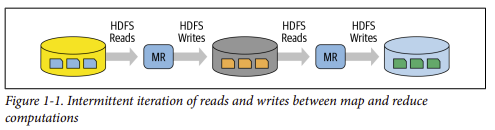
And finally, even though Hadoop MR was conducive to large-scale jobs for general
batch processing, it fell short for combining other workloads such as machine learn‐
ing, streaming, or interactive SQL-like queries.
To handle these new workloads, engineers developed bespoke systems (Apache Hive,
Apache Storm, Apache Impala, Apache Giraph, Apache Drill, Apache Mahout, etc.),
each with their own APIs and cluster configurations, further adding to the opera‐
tional complexity of Hadoop and the steep learning curve for developers.
The question then became (bearing in mind Alan Kay’s adage, “Simple things should
be simple, complex things should be possible”), was there a way to make Hadoop and
MR simpler and faster?

## Spark’s Early Years at AMPLab

Researchers at UC Berkeley who had previously worked on Hadoop MapReduce took
on this challenge with a project they called Spark. They acknowledged that MR was
inefficient (or intractable) for interactive or iterative computing jobs and a complex
framework to learn, so from the onset they embraced the idea of making Spark sim‐
pler, faster, and easier. This endeavor started in 2009 at the RAD Lab, which later
became the AMPLab (and now is known as the RISELab).
Early papers published on Spark demonstrated that it was 10 to 20 times faster than
Hadoop MapReduce for certain jobs. Today, it’s many orders of magnitude faster. The
central thrust of the Spark project was to bring in ideas borrowed from Hadoop Map‐
Reduce, but to enhance the system: make it highly fault tolerant and embarrassingly
parallel, support in-memory storage for intermediate results between iterative and
interactive map and reduce computations, offer easy and composable APIs in multi‐
ple languages as a programming model, and support other workloads in a unified
manner. We’ll come back to this idea of unification shortly, as it’s an important theme
in Spark.
By 2013 Spark had gained widespread use, and some of its original creators and
researchers—Matei Zaharia, Ali Ghodsi, Reynold Xin, Patrick Wendell, Ion Stoica,
and Andy Konwinski—donated the Spark project to the ASF and formed a company
called Databricks.
Databricks and the community of open source developers worked to release Apache
Spark 1.0 in May 2014, under the governance of the ASF. This first major release
established the momentum for frequent future releases and contributions of notable
features to Apache Spark from Databricks and over 100 commercial vendors.

## What Is Apache Spark?

Apache Spark is a unified engine designed for large-scale distributed data processing,
on premises in data centers or in the cloud.
Spark provides in-memory storage for intermediate computations, making it much
faster than Hadoop MapReduce. It incorporates libraries with composable APIs for
machine learning (MLlib), SQL for interactive queries (Spark SQL), stream process‐
ing (Structured Streaming) for interacting with real-time data, and graph processing
(GraphX).
Spark’s design philosophy centers around four key characteristics:
* Speed
* Ease of use
* Modularity
* Extensibility

Let’s take a look at what this means for the framework.

**Speed**

Spark has pursued the goal of speed in several ways. First, its internal implementation
benefits immensely from the hardware industry’s recent huge strides in improving
the price and performance of CPUs and memory. Today’s commodity servers come
cheap, with hundreds of gigabytes of memory, multiple cores, and the underlying
Unix-based operating system taking advantage of efficient multithreading and paral‐
lel processing. The framework is optimized to take advantage of all of these factors.
Second, Spark builds its query computations as a directed acyclic graph (DAG); its
DAG scheduler and query optimizer construct an efficient computational graph that
can usually be decomposed into tasks that are executed in parallel across workers on
the cluster. And third, its physical execution engine, Tungsten, uses whole-stage code
generation to generate compact code for execution (we will cover SQL optimization
and whole-stage code generation in Chapter 3).
With all the intermediate results retained in memory and its limited disk I/O, this
gives it a huge performance boost.

**Ease of Use**

Spark achieves simplicity by providing a fundamental abstraction of a simple logical
data structure called a Resilient Distributed Dataset (RDD) upon which all other
higher-level structured data abstractions, such as DataFrames and Datasets, are con‐
structed. By providing a set of transformations and actions as operations, Spark offers
a simple programming model that you can use to build big data applications in famil‐
iar languages.

**Modularity**

Spark operations can be applied across many types of workloads and expressed in any
of the supported programming languages: Scala, Java, Python, SQL, and R. Spark
offers unified libraries with well-documented APIs that include the following mod‐
ules as core components: Spark SQL, Spark Structured Streaming, Spark MLlib, and
GraphX, combining all the workloads running under one engine. We’ll take a closer
look at all of these in the next section.
You can write a single Spark application that can do it all—no need for distinct
engines for disparate workloads, no need to learn separate APIs. With Spark, you get
a unified processing engine for your workloads.

**Extensibility**

Spark focuses on its fast, parallel computation engine rather than on storage. Unlike
Apache Hadoop, which included both storage and compute, Spark decouples the two.
That means you can use Spark to read data stored in myriad sources—Apache
Hadoop, Apache Cassandra, Apache HBase, MongoDB, Apache Hive, RDBMSs, and
more—and process it all in memory. Spark’s DataFrameReaders and DataFrame
Writers can also be extended to read data from other sources, such as Apache Kafka,
Kinesis, Azure Storage, and Amazon S3, into its logical data abstraction, on which it
can operate.
The community of Spark developers maintains a list of third-party Spark packages as
part of the growing ecosystem (see Figure 1-2). This rich ecosystem of packages
includes Spark connectors for a variety of external data sources, performance moni‐
tors, and more.
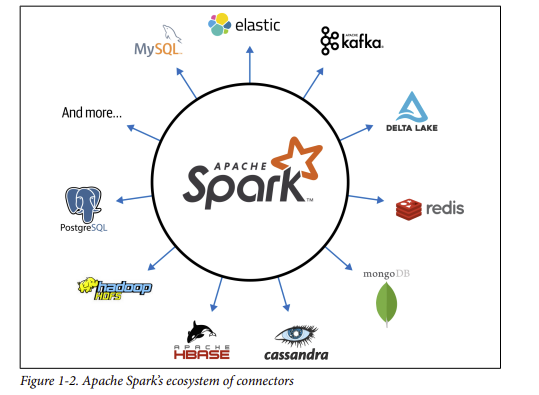

## Unified Analytics

While the notion of unification is not unique to Spark, it is a core component of its
design philosophy and evolution. In November 2016, the Association for Computing
Machinery (ACM) recognized Apache Spark and conferred upon its original creators
the prestigious ACM Award for their paper describing Apache Spark as a “Unified
Engine for Big Data Processing.” The award-winning paper notes that Spark replaces
all the separate batch processing, graph, stream, and query engines like Storm,
Impala, Dremel, Pregel, etc. with a unified stack of components that addresses diverse
workloads under a single distributed fast engine.

**Apache Spark Components as a Unified Stack**

As shown in Figure 1-3, Spark offers four distinct components as libraries for diverse
workloads: Spark SQL, Spark MLlib, Spark Structured Streaming, and GraphX. Each
of these components is separate from Spark’s core fault-tolerant engine, in that you
use APIs to write your Spark application and Spark converts this into a DAG that is
executed by the core engine. So whether you write your Spark code using the pro‐
vided Structured APIs (which we will cover in Chapter 3) in Java, R, Scala, SQL, or Python, the underlying code is decomposed into highly compact bytecode that is exe‐
cuted in the workers’ JVMs across the cluster.
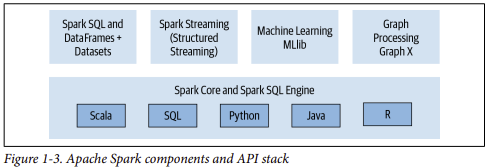
Let’s look at each of these components in more detail.

***Spark SQL***

This module works well with structured data. You can read data stored in an RDBMS
table or from file formats with structured data (CSV, text, JSON, Avro, ORC, Parquet,
etc.) and then construct permanent or temporary tables in Spark. Also, when using
Spark’s Structured APIs in Java, Python, Scala, or R, you can combine SQL-like quer‐
ies to query the data just read into a Spark DataFrame. To date, Spark SQL is ANSI
SQL:2003-compliant and it also functions as a pure SQL engine.
For example, in this Scala code snippet, you can read from a JSON file stored on
Amazon S3, create a temporary table, and issue a SQL-like query on the results read
into memory as a Spark DataFrame:

~~~
// In Scala
// Read data off Amazon S3 bucket into a Spark DataFrame
spark.read.json("s3://apache_spark/data/committers.json")
 .createOrReplaceTempView("committers")
// Issue a SQL query and return the result as a Spark DataFrame
val results = spark.sql("""SELECT name, org, module, release, num_commits
 FROM committers WHERE module = 'mllib' AND num_commits > 10
 ORDER BY num_commits DESC""")
~~~
You can write similar code snippets in Python, R, or Java, and the generated bytecode
will be identical, resulting in the same performance.

**Spark MLlib**

Spark comes with a library containing common machine learning (ML) algorithms
called MLlib. Since Spark’s first release, the performance of this library component
has improved significantly because of Spark 2.x’s underlying engine enhancements.
MLlib provides many popular machine learning algorithms built atop high-level
DataFrame-based APIs to build models.

Starting with Apache Spark 1.6, the MLlib project is split between
two packages: spark.mllib and spark.ml. The DataFrame-based
API is the latter while the former contains the RDD-based APIs,
which are now in maintenance mode. All new features go into
spark.ml. This book refers to “MLlib” as the umbrella library for
machine learning in Apache Spark.

These APIs allow you to extract or transform features, build pipelines (for training
and evaluating), and persist models (for saving and reloading them) during deploy‐
ment. Additional utilities include the use of common linear algebra operations and
statistics. MLlib includes other low-level ML primitives, including a generic gradient
descent optimization. The following Python code snippet encapsulates the basic oper‐
ations a data scientist may do when building a model (more extensive examples will
be discussed in Chapters 10 and 11):
~~~
# In Python
from pyspark.ml.classification import LogisticRegression
...
training = spark.read.csv("s3://...")
test = spark.read.csv("s3://...")
# Load training data
lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)
# Fit the model
lrModel = lr.fit(training)
# Predict
lrModel.transform(test)
...
~~~
**Spark Structured Streaming**

Apache Spark 2.0 introduced an experimental Continuous Streaming model and
Structured Streaming APIs, built atop the Spark SQL engine and DataFrame-based
APIs. By Spark 2.2, Structured Streaming was generally available, meaning that devel‐
opers could use it in their production environments.
Necessary for big data developers to combine and react in real time to both static data
and streaming data from engines like Apache Kafka and other streaming sources, the
new model views a stream as a continually growing table, with new rows of data
appended at the end. Developers can merely treat this as a structured table and issue
queries against it as they would a static table.
Underneath the Structured Streaming model, the Spark SQL core engine handles all
aspects of fault tolerance and late-data semantics, allowing developers to focus on
writing streaming applications with relative ease. This new model obviated the old
DStreams model in Spark’s 1.x series, which we will discuss in more detail in Chap‐
ter 8. Furthermore, Spark 2.x and Spark 3.0 extended the range of streaming data
sources to include Apache Kafka, Kinesis, and HDFS-based or cloud storage.
The following code snippet shows the typical anatomy of a Structured Streaming
application. It reads from a localhost socket and writes the word count results to an
Apache Kafka topic:
~~~
# In Python
# Read a stream from a local host
from pyspark.sql.functions import explode, split
lines = (spark
 .readStream
 .format("socket")
 .option("host", "localhost")
 .option("port", 9999)
 .load())
# Perform transformation
# Split the lines into words
words = lines.select(explode(split(lines.value, " ")).alias("word"))
# Generate running word count
word_counts = words.groupBy("word").count()
# Write out to the stream to Kafka
query = (word_counts
 .writeStream
 .format("kafka")
 .option("topic", "output"))
 ~~~
 **GraphX**
 
As the name suggests, GraphX is a library for manipulating graphs (e.g., social net‐
work graphs, routes and connection points, or network topology graphs) and per‐
forming graph-parallel computations. It offers the standard graph algorithms for
analysis, connections, and traversals, contributed by users in the community: the
available algorithms include PageRank, Connected Components, and Triangle
Counting.1
This code snippet shows a simple example of how to join two graphs using the
GraphX APIs:
 ~~~
 // In Scala
val graph = Graph(vertices, edges)
messages = spark.textFile("hdfs://...")
val graph2 = graph.joinVertices(messages) {
 (id, vertex, msg) => ...
}
 ~~~
 

## Apache Spark’s Distributed Execution

If you have read this far, you already know that Spark is a distributed data processing
engine with its components working collaboratively on a cluster of machines. Before
we explore programming with Spark in the following chapters of this book, you need
to understand how all the components of Spark’s distributed architecture work
together and communicate, and what deployment modes are available.
Let’s start by looking at each of the individual components shown in Figure 1-4 and
how they fit into the architecture. At a high level in the Spark architecture, a Spark
application consists of a driver program that is responsible for orchestrating parallel
operations on the Spark cluster. The driver accesses the distributed components in
the cluster—the Spark executors and cluster manager—through a SparkSession.
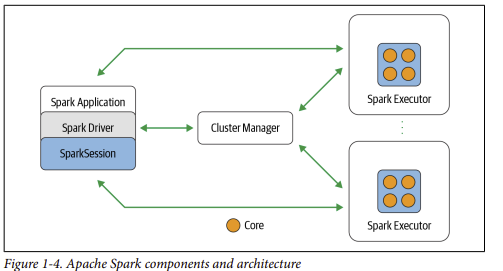
**Spark driver**

As the part of the Spark application responsible for instantiating a SparkSession, the
Spark driver has multiple roles: it communicates with the cluster manager; it requests
resources (CPU, memory, etc.) from the cluster manager for Spark’s executors
(JVMs); and it transforms all the Spark operations into DAG computations, schedules them, and distributes their execution as tasks across the Spark executors. Once the
resources are allocated, it communicates directly with the executors.
SparkSession
In Spark 2.0, the SparkSession became a unified conduit to all Spark operations and
data. Not only did it subsume previous entry points to Spark like the SparkContext,
SQLContext, HiveContext, SparkConf, and StreamingContext, but it also made
working with Spark simpler and easier.

Although in Spark 2.x the SparkSession subsumes all other con‐
texts, you can still access the individual contexts and their respec‐
tive methods. In this way, the community maintained backward
compatibility. That is, your old 1.x code with SparkContext or
SQLContext will still work.

Through this one conduit, you can create JVM runtime parameters, define Data‐
Frames and Datasets, read from data sources, access catalog metadata, and issue
Spark SQL queries. SparkSession provides a single unified entry point to all of
Spark’s functionality.
In a standalone Spark application, you can create a SparkSession using one of the
high-level APIs in the programming language of your choice. In the Spark shell
(more on this in the next chapter) the SparkSession is created for you, and you can
access it via a global variable called spark or sc.
Whereas in Spark 1.x you would have had to create individual contexts (for stream‐
ing, SQL, etc.), introducing extra boilerplate code, in a Spark 2.x application you can
create a SparkSession per JVM and use it to perform a number of Spark operations.
Let’s take a look at an example:
 ~~~
// In Scala
import org.apache.spark.sql.SparkSession
// Build SparkSession
val spark = SparkSession
 .builder
 .appName("LearnSpark")
 .config("spark.sql.shuffle.partitions", 6)
 .getOrCreate()
...
// Use the session to read JSON
val people = spark.read.json("...")
...
// Use the session to issue a SQL query
val resultsDF = spark.sql("SELECT city, pop, state, zip FROM table_name")
 ~~~
 **Cluster manager**
 
The cluster manager is responsible for managing and allocating resources for the
cluster of nodes on which your Spark application runs. Currently, Spark supports
four cluster managers: the built-in standalone cluster manager, Apache Hadoop
YARN, Apache Mesos, and Kubernetes.

**Spark executor**

A Spark executor runs on each worker node in the cluster. The executors communi‐
cate with the driver program and are responsible for executing tasks on the workers.
In most deployments modes, only a single executor runs per node.
**Deployment modes**

An attractive feature of Spark is its support for myriad deployment modes, enabling
Spark to run in different configurations and environments. Because the cluster man‐
ager is agnostic to where it runs (as long as it can manage Spark’s executors and
fulfill resource requests), Spark can be deployed in some of the most popular envi‐
ronments—such as Apache Hadoop YARN and Kubernetes—and can operate in dif‐
ferent modes. Table 1-1 summarizes the available deployment modes.
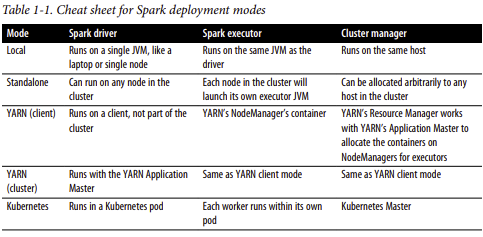
**Distributed data and partitions**

Actual physical data is distributed across storage as partitions residing in either HDFS
or cloud storage (see Figure 1-5). While the data is distributed as partitions across the
physical cluster, Spark treats each partition as a high-level logical data abstraction—as
a DataFrame in memory. Though this is not always possible, each Spark executor is
preferably allocated a task that requires it to read the partition closest to it in the net‐work, observing data locality.
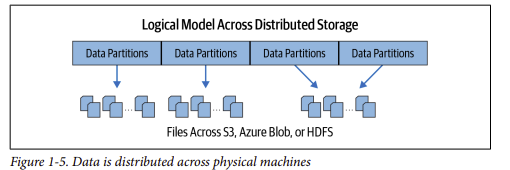
Partitioning allows for efficient parallelism. A distributed scheme of breaking up data
into chunks or partitions allows Spark executors to process only data that is close to
them, minimizing network bandwidth. That is, each executor’s core is assigned its
own data partition to work on (see Figure 1-6).
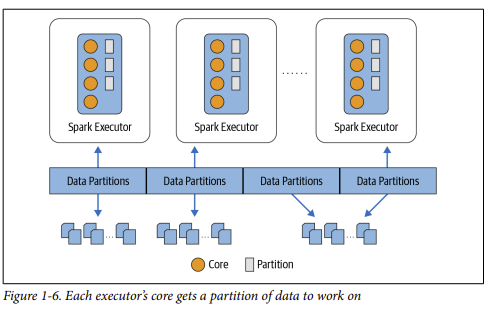
For example, this code snippet will break up the physical data stored across clusters
into eight partitions, and each executor will get one or more partitions to read into its
memory:
 ~~~
# In Python
log_df = spark.read.text("path_to_large_text_file").repartition(8)
print(log_df.rdd.getNumPartitions())
 ~~~
And this code will create a DataFrame of 10,000 integers distributed over eight parti‐
tions in memory:
 ~~~
 # In Python
df = spark.range(0, 10000, 1, 8)
print(df.rdd.getNumPartitions())
  ~~~
Both code snippets will print out 8.

In Chapters 3 and 7, we will discuss how to tune and change partitioning configura‐
tion for maximum parallelism based on how many cores you have on your executors.

## The Developer’s Experience
Of all the developers’ delights, none is more attractive than a set of composable APIs
that increase productivity and are easy to use, intuitive, and expressive. One of
Apache Spark’s principal appeals to developers has been its easy-to-use APIs for oper‐
ating on small to large data sets, across languages: Scala, Java, Python, SQL, and R.
One primary motivation behind Spark 2.x was to unify and simplify the framework
by limiting the number of concepts that developers have to grapple with. Spark 2.x
introduced higher-level abstraction APIs as domain-specific language constructs,
which made programming Spark highly expressive and a pleasant developer experi‐
ence. You express what you want the task or operation to compute, not how to com‐
pute it, and let Spark ascertain how best to do it for you. We will cover these
Structured APIs in Chapter 3, but first let’s take a look at who the Spark developers
are.
#### Who Uses Spark, and for What?
Not surprisingly, most developers who grapple with big data are data engineers, data
scientists, or machine learning engineers. They are drawn to Spark because it allows
them to build a range of applications using a single engine, with familiar program‐
ming languages.
Of course, developers may wear many hats and sometimes do both data science and
data engineering tasks, especially in startup companies or smaller engineering groups.
Among all these tasks, however, data—massive amounts of data—is the foundation.

**Data science tasks**

As a discipline that has come to prominence in the era of big data, data science is
about using data to tell stories. But before they can narrate the stories, data scientists
have to cleanse the data, explore it to discover patterns, and build models to predict
or suggest outcomes. Some of these tasks require knowledge of statistics, mathemat‐
ics, computer science, and programming.
Most data scientists are proficient in using analytical tools like SQL, comfortable with
libraries like NumPy and pandas, and conversant in programming languages like R and Python. But they must also know how to wrangle or transform data, and how to
use established classification, regression, or clustering algorithms for building mod‐
els. Often their tasks are iterative, interactive or ad hoc, or experimental to assert their
hypotheses.
Fortunately, Spark supports these different tools. Spark’s MLlib offers a common set
of machine learning algorithms to build model pipelines, using high-level estimators,
transformers, and data featurizers. Spark SQL and the Spark shell facilitate interactive
and ad hoc exploration of data.
Additionally, Spark enables data scientists to tackle large data sets and scale their
model training and evaluation. Apache Spark 2.4 introduced a new gang scheduler, as
part of Project Hydrogen, to accommodate the fault-tolerant needs of training and
scheduling deep learning models in a distributed manner, and Spark 3.0 has intro‐
duced the ability to support GPU resource collection in the standalone, YARN, and
Kubernetes deployment modes. This means developers whose tasks demand deep
learning techniques can use Spark.

**Data engineering tasks**

After building their models, data scientists often need to work with other team mem‐
bers, who may be responsible for deploying the models. Or they may need to work
closely with others to build and transform raw, dirty data into clean data that is easily
consumable or usable by other data scientists. For example, a classification or cluster‐
ing model does not exist in isolation; it works in conjunction with other components
like a web application or a streaming engine such as Apache Kafka, or as part of a
larger data pipeline. This pipeline is often built by data engineers.
Data engineers have a strong understanding of software engineering principles and
methodologies, and possess skills for building scalable data pipelines for a stated busi‐
ness use case. Data pipelines enable end-to-end transformations of raw data coming
from myriad sources—data is cleansed so that it can be consumed downstream by
developers, stored in the cloud or in NoSQL or RDBMSs for report generation, or
made accessible to data analysts via business intelligence tools.
Spark 2.x introduced an evolutionary streaming model called continuous applications
with Structured Streaming (discussed in detail in Chapter 8). With Structured
Streaming APIs, data engineers can build complex data pipelines that enable them to
ETL data from both real-time and static data sources.
Data engineers use Spark because it provides a simple way to parallelize computations
and hides all the complexity of distribution and fault tolerance. This leaves them free
to focus on using high-level DataFrame-based APIs and domain-specific language
(DSL) queries to do ETL, reading and combining data from multiple sources.
The performance improvements in Spark 2.x and Spark 3.0, due to the Catalyst opti‐
mizer for SQL and Tungsten for compact code generation, have made life for data
engineers much easier. They can choose to use any of the three Spark APIs—RDDs,
DataFrames, or Datasets—that suit the task at hand, and reap the benefits of Spark.

**Popular Spark use cases**

Whether you are a data engineer, data scientist, or machine learning engineer, you’ll
find Spark useful for the following use cases:
• Processing in parallel large data sets distributed across a cluster
• Performing ad hoc or interactive queries to explore and visualize data sets
• Building, training, and evaluating machine learning models using MLlib
• Implementing end-to-end data pipelines from myriad streams of data
• Analyzing graph data sets and social networks
### Community Adoption and Expansion
Not surprisingly, Apache Spark struck a chord in the open source community, espe‐
cially among data engineers and data scientists. Its design philosophy and its inclu‐
sion as an Apache Software Foundation project have fostered immense interest
among the developer community.
Today, there are over 600 Apache Spark Meetup groups globally with close to half a
million members. Every week, someone in the world is giving a talk at a meetup or
conference or sharing a blog post on how to use Spark to build data pipelines. The
Spark + AI Summit is the largest conference dedicated to the use of Spark for
machine learning, data engineering, and data science across many verticals.
Since Spark’s first 1.0 release in 2014 there have been many minor and major releases,
with the most recent major release of Spark 3.0 coming in 2020. This book will cover
aspects of Spark 2.x and Spark 3.0. By the time of its publication the community will
have released Spark 3.0, and most of the code in this book has been tested with Spark
3.0-preview2.
Over the course of its releases, Spark has continued to attract contributors from
across the globe and from numerous organizations. Today, Spark has close to 1,500
contributors, well over 100 releases, 21,000 forks, and some 27,000 commits on Git‐
Hub, as Figure 1-7 shows. And we hope that when you finish this book, you will feel
compelled to contribute too.
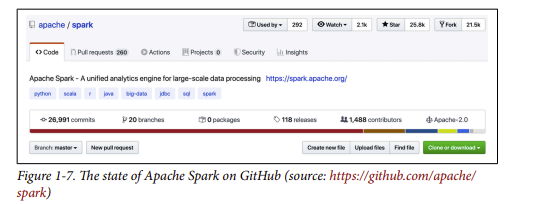
Now we can turn our attention to the fun of learning—where and how to start using
Spark. In the next chapter, we’ll show you how to get up and running with Spark in
three simple steps.